# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rizal Dwi Anggoro
- **Email:** gnoogler4@gmail.com
- **ID Dicoding:** rizalanggoro

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan total transaksi peminjaman sepeda antara hari kerja dan hari libur?
- Apakah faktor cuaca berpengaruh terhadap peminjaman sepeda antara pelanggan casual dan registered?
- Apakah faktor musim berpengaruh terhadap peminjaman sepeda antara pelanggan casual dan registered?

## Import Semua Packages/Library yang Digunakan

In [396]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Pada tahap data wrangling, kita akan mengimpor dan menggunakan data csv yang sudah disediakan, yaitu **day.csv**

In [397]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset tersebut berisi transaksi peminjaman sepeda setiap harinya pada tahun 2011 sampai tahun 2012. 
- Dataset tersebut berisi transaksi peminjaman sepeda setiap harinya berkaitan dengan kondisi lingkungan seperti cuaca, musim, kelembapan, dll. 
- Dataset tersebut berisi transaksi peminjaman sepeda setiap harinya berdasarkan jenis pengguna. 
- Dataset tersebut berisi beberapa attribute sebagai berikut:
  * instant     : record index
  * dteday      : tanggal
  * season      : musim (1: semi, 2: panas, 3: gugur, 4: dingin)
  * yr          : tahun (0: 2011, 1:2012)
  * mnth        : bulan (1 sampai 12)
  * holiday     : apakah hari libur
  * weekday     : (0 sampai 6)
  * workingday  : apakah hari kerja.
  * weathersit  :
    * 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
    * 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
    * 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
    * 4: Hujan Lebat + Es + Badai Petir + Kabut, Salju + Kabut
  * temp : normalized temperature in celsius.
  * atemp: normalized feeling temperature in celsius.
  * hum: normalized humidity. 
  * windspeed: normalized wind speed.
  * casual: jumlah pengguna biasa 
  * registered: jumlah pengguna terdaftar
  * cnt: total peminjaman dari semua jenis pengguna

### Assessing Data

Menilai data peminjaman sepeda harian

In [398]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [399]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [400]:
day_df.duplicated().sum()

np.int64(0)

In [401]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Beberapa columns telah dilakukan normalisasi seperti `temp, atemp, hum, dan windspeed`
- Dataset sudah dalam keadaan bersih, tetapi terdapat satu column yang salah data type, yaitu dteday (object) yang seharusnya memiliki data type berupa datetime.
- Tidak terdapat duplikasi pada dataset tersebut. 
- Tidak terdapat missing value pada dataset tersebut.

### Cleaning Data

In [402]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Pada tahap cleaning dilakukan perubahan data type column `dteday` menjadi datetime. 
- Dataset sudah dalam keadaan bersih, sehingga tidak perlu dilakukan cleaning lebih lanjut. 

## Exploratory Data Analysis (EDA)

### Explore ...

In [403]:
day_df['workingday_group'] = day_df['workingday'].map({
    0: 'Hari Libur', 
    1: 'Hari Kerja', 
})
print('Jumlah transaksi berdasarkan hari:')
day_df.groupby('workingday_group')[['casual', 'registered', 'cnt']].sum()

Jumlah transaksi berdasarkan hari:


,casual,registered,cnt
workingday_group,,,
Hari Kerja,303285,1989125,2292410
Hari Libur,316732,683537,1000269


In [404]:
day_df['weathersit_group'] = day_df['weathersit'].map({
    1: 'Cerah', 
    2: 'Berkabut/berawan', 
    3: 'Salju ringan/hujan ringan', 
    4: 'Hujan lebat/badai', 
})
print('Jumlah transaksi berdasarkan cuaca:')
day_df.groupby('weathersit_group')[['casual', 'registered', 'cnt']].sum()

Jumlah transaksi berdasarkan cuaca:


,casual,registered,cnt
weathersit_group,,,
Berkabut/berawan,169776,827082,996858
Cerah,446346,1811606,2257952
Salju ringan/hujan ringan,3895,33974,37869


In [405]:
day_df['season_group'] = day_df['season'].map({
    1: 'Musim Semi', 
    2: 'Musim Panas', 
    3: 'Musim Gugur',
    4: 'Musim Dingin', 
})
print('Jumlah transaksi berdasarkan musim:')
day_df.groupby('season_group')[['casual', 'registered', 'cnt']].sum()

Jumlah transaksi berdasarkan musim:


,casual,registered,cnt
season_group,,,
Musim Dingin,129782,711831,841613
Musim Gugur,226091,835038,1061129
Musim Panas,203522,715067,918589
Musim Semi,60622,410726,471348


**Insight:**
- Hari kerja adalah hari dengan transaksi peminjaman terbanyak. 
- Cuaca cerah adalah cuaca dengan transaksi peminjaman terbanyak. 
- Musim gugur adalah musim dengan transaksi peminjaman terbanyak. 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan total transaksi penyewaan sepeda antara hari kerja dan hari libur?

Manual grouping digunakan untuk mengkategorikan data hari menjadi dua label yang mudah dipahami, yaitu hari kerja dan hari libur. Pie plot digunakan untuk memvisualisasikan jumlah transaksi peminjaman antara hari kerja dan hari libur. Hal ini bertujuan untuk mempermudah proses identifikasi jumlah transaksi peminjaman sepeda berdasarkan jenis harinya. 

(np.float64(-1.0999996573206112),
 np.float64(1.0999990982311825),
 np.float64(-1.099998493768436),
 np.float64(1.0999999282746875))

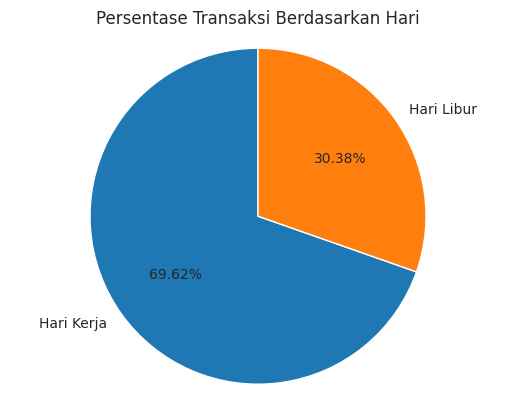

In [406]:
day_analysis = day_df.groupby('workingday_group')['cnt'].sum()

day_analysis.plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title('Persentase Transaksi Berdasarkan Hari')
plt.ylabel('')
plt.axis('equal')

### Pertanyaan 2: Apakah faktor cuaca berpengaruh terhadap penyewaan sepeda antara pelanggan casual dan registered?

Manual grouping digunakan untuk mengkategorikan data cuaca menjadi beberapa label yang mudah dipahami, yaitu berkabut/berawan, cerah, salju ringan/hujan ringan, dan hujan lebat/badai. Bar plot digunakan untuk memvisualisasikan rata-rata transaksi peminjaman antara pengguna casual dan registered berdasarkan kategori cuaca. Hal ini bertujuan untuk mempermudah proses identifikasi kondisi cuaca dengan rata-rata peminjaman sepeda oleh semua jenis pengguna. 

Text(0, 0.5, 'Rata-rata transaksi')

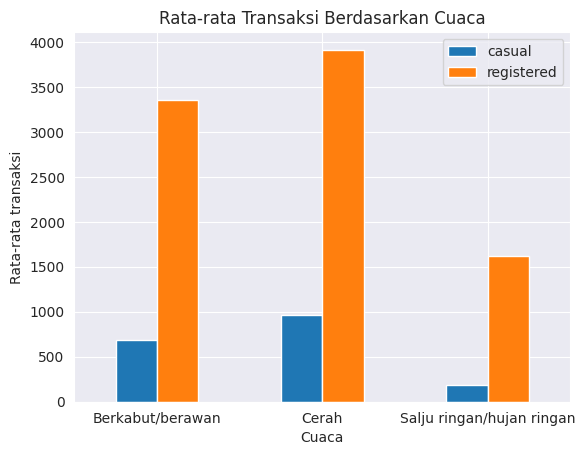

In [407]:
weather_analysis = day_df.groupby('weathersit_group')[['casual', 'registered']].mean()

weather_analysis.plot(kind='bar')
plt.title('Rata-rata Transaksi Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.xticks(rotation=0)
plt.ylabel('Rata-rata transaksi')

### Pertanyaan 3: Apakah faktor musim berpengaruh terhadap penyewaan sepeda antara pelanggan casual dan registered?

Manual grouping digunakan untuk mengkategorikan data musim menjadi beberapa label yang mudah dipahami, yaitu musim dingin, gugur, panas, dan semi. Line plot digunakan untuk memvisualisasikan rata-rata transaksi peminjaman antara pengguna casual dan registered berdasarkan kategori musim. Hal ini bertujuan untuk mempermudah proses identifikasi dan analsis kondisi musim dengan rata-rata peminjaman sepeda oleh semua jenis pengguna. 

Text(0, 0.5, 'Rata-rata transaksi')

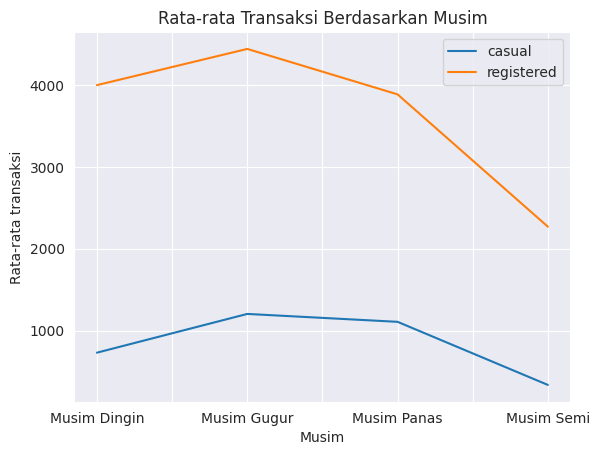

In [408]:
season_analysis = day_df.groupby('season_group')[['casual', 'registered']].mean()

season_analysis.plot(kind='line')
plt.title('Rata-rata Transaksi Berdasarkan Musim')
plt.xlabel('Musim')
plt.xticks(rotation=0)
plt.ylabel('Rata-rata transaksi')

## Conclusion

#### Bagaimana perbedaan total transaksi penyewaan sepeda antara hari kerja dan hari libur?

Berdasarkan data dua tahun di atas, total transaksi peminjaman sepeda paling banyak dilakukan pada hari kerja, yaitu sebesar 69.62% diikuti dengan hari libur, yaitu sebesar 30.38%. 
<br><br>

#### Apakah faktor cuaca berpengaruh terhadap penyewaan sepeda antara pelanggan casual dan registered?

Berdasarkan data dua tahun di atas, rata-rata pengguna casual dan pengguna registered cenderung melakukan transaksi peminjaman sepeda ketika cuaca sedang cerah, kemudian diikuti dengan cuaca berkabut/berawan, dan salju ringan/hujan ringan. Tidak pernah ada transaksi peminjaman sepeda ketika cuaca sedang hujan lebat/badai.  
<br><br>

#### Apakah faktor musim berpengaruh terhadap penyewaan sepeda antara pelanggan casual dan registered?

Berdasarkan data dua tahun di atas, rata-rata pengguna registered melakukan transaksi peminjaman sepeda terbanyak ketika musim gugur, diikuti dengan musim dingin, musim panas, dan musim semi. Sedangkan pengguna casual terdapat sedikit perbedaan, yaitu transaksi peminjaman sepeda terbanyak ketika musim gugur, musim panas, musim dingin, dan musim semi. 